In [11]:
%matplotlib inline

from modsim import *
from pandas import *
import csv

file = open('data/data.csv')
data = csv.reader(file)

model_system = System()

def plot_data(data):
    #function that plots data given csv file. First row is x-axis and second row is y-axis
    counter = 0
    newfig()
    decorate(xlabel = 'Year',
            ylabel = '% of women in the workforce')
    for i in data:
        if (counter > 0):
            plot(float(i[0]), float(i[1]), 'go', label='bls')
        counter += 1
    
def plot_results(system):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot_data(data) 
    plot(system.results, '--', color='gray', label='model') #plots the model
    decorate(xlabel='Year', 
             ylabel='% of women in the workforce')
    
def run_simulation(system, update_func):
    """Run a model.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = Series([])
    results[system.t0] = system.rate0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results

def update_func2(rate, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * rate + system.beta * rate**2 - 50302 #replace with logistic eq
    return rate + net_growth


In [12]:
t0 = 0 #user can input this 
rate0 = 40 #user inputs this
t_end = 2017 #user can input this
system = System(t0=t0, 
                t_end=t_end,
                rate0 = rate0,
                alpha=50.245,
                beta=-0.0125)
# y = -0.0125x2 + 50.245x - 50302


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in double_scalars


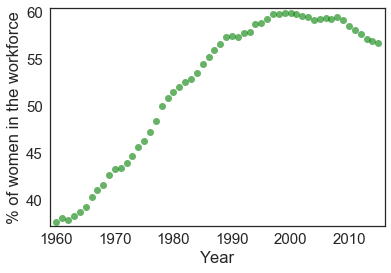

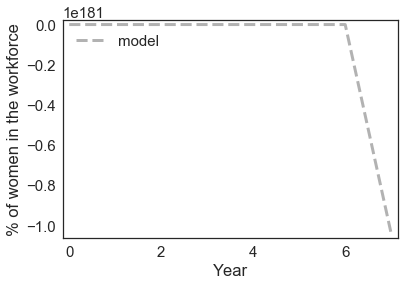

In [13]:
plot_data(data)
run_simulation(system, update_func2)
plot_results(system)